In [ ]:
map_scale = 3
p = 0.5
!optuna-dashboard sqlite:///optuna_studies/{2**map_scale}x{2**map_scale}_p_{p}.db

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optuna

In [2]:
def plot_accuracy_evolution(trial, label=""):
    def smooth(x, w=0.01):
        filter = jnp.ones(int(1 + w * len(x)))
        smoothed = jnp.convolve(jnp.array(x), filter / filter.sum(), mode="full")
        return smoothed[: len(x)]

    mean = smooth(trial.user_attrs["accuracy_evol_mean"])
    std = smooth(trial.user_attrs["accuracy_evol_std"])
    upper_bound = smooth(trial.user_attrs["accuracy_evol_max"])
    lower_bound = smooth(trial.user_attrs["accuracy_evol_min"])
    plt.plot(mean, label=label)
    color = plt.gca().lines[-1].get_color()
    # plt.plot(smooth(mean+std), color=color, linestyle="--")
    # plt.plot(smooth(mean-std), color=color, linestyle="--")
    plt.fill_between(range(len(mean)), smooth(upper_bound), smooth(lower_bound), alpha=0.3, color=color)
    stages_duration = trial.user_attrs["stages_duration"]
    for stage_duration in jnp.cumsum(jnp.array(stages_duration)):
        plt.axvline(stage_duration-1, color="k", linestyle="--")

2024-03-16 00:24:48.244020: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
CUDA backend failed to initialize: FAILED_PRECONDITION: No visible GPU devices. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


n_trials 256
n_trials 256
n_trials 315


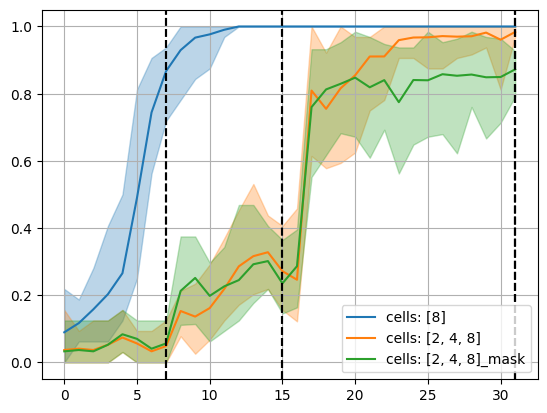

In [3]:
map_scale = 3
p = 0.8

storage_path = f"sqlite:///optuna_studies/{2**map_scale}x{2**map_scale}_p_{p}.db"
for cell_scales in [(map_scale,), tuple(range(1, map_scale + 1))]:
    study = optuna.load_study(study_name=f"mango_stages_{list(cell_scales)}", storage=storage_path)
    print("n_trials", len(study.trials))
    plot_accuracy_evolution(study.best_trial, label=f"cells: {[2**s for s in cell_scales]}")

study = optuna.load_study(study_name=f"mango_stages_{list(cell_scales)}_mask", storage=storage_path)
print("n_trials", len(study.trials))
plot_accuracy_evolution(study.best_trial, label=f"cells: {[2**s for s in cell_scales]}_mask")
plt.grid()
plt.legend()